# Import Data

In [ ]:
import numpy as np
import pandas as pd
from pandas import DataFrame

import missingno

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

sns.set_theme(style="darkgrid")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load data
netflix_data= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/netflix_titles.csv')
print(netflix_data)
print(netflix_data.head())

     show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa 

# Data Cleaning

In [ ]:
# Identify Missing Values:
missing_values = netflix_data.isnull().sum()
print(missing_values)
# Handle Missing Values:
netflix_data['country'].fillna('Unknown', inplace=True)
# Normalize Data Formats
netflix_data['release_year'] = pd.to_datetime(netflix_data['release_year'], format='%Y')
# Remove Duplicates:
netflix_data.drop_duplicates(inplace=True)
# Check for Consistency in Categorical Data:

print(netflix_data)



show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64
     show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movi

# Data Exploration:

In [ ]:
print(netflix_data.head())
print(netflix_data.columns)


  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...        Unknown   
3                                                NaN        Unknown   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added release_year rating   duration  \
0  September 25, 2021   2020-01-01  PG-13     90 min   
1  September 24, 2021   2021-01-01  TV-MA  2 Seasons   
2  September 24, 2021   2021-01-

# 1. Regional biases in content availability.
Regional Content Preferences and Availability:
Given that Netflix operates in multiple nations and regions, it is critical for good content management to analyze how regional factors affect content availability and preferences.

Key Questions:
1. Are there any regional biases in content availability?
2. Are there regional preferences in terms of the type of content?

Implications: Knowledge of regional variations can help with content acquisition, localization, and the development of regional marketing plans for Netflix.


In [ ]:
# Analysis of regional biases in content availability

# Counting the number of titles available in each country
# Since a single title can be available in multiple countries, we'll split the country entries and count them separately
country_counts = netflix_data['country'].str.split(', ').explode().value_counts()

# Display the top 20 countries with the most content
top_countries = country_counts.head(20)
top_countries



United States     3689
India             1046
Unknown            831
United Kingdom     804
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Mexico             169
China              162
Australia          160
Egypt              117
Turkey             113
Hong Kong          105
Nigeria            103
Italy              100
Brazil              97
Argentina           91
Name: country, dtype: int64

The analysis of regional biases in content availability on Netflix reveals the following:

United States: The highest number of titles (3689) are available in the United States.

India: India comes second with 1046 titles.

United Kingdom: The United Kingdom is third with 804 titles.

Other countries with notable content availability include Canada, France, Japan,
Spain, South Korea, Germany, and Mexico.

This data indicates a significant bias towards English-speaking countries,

particularly the United States and the United Kingdom,

in terms of content availability. Additionally,

there's a notable presence of content from India, reflecting a diverse range of
regional offerings.

In [ ]:
# Analysis of regional preferences in terms of content type (genre)

# We'll group the data by country and then analyze the most common genres in each country
# Splitting the country and listed_in entries for accurate counting
expanded_data = netflix_data.dropna(subset=['country', 'listed_in'])
expanded_data['country'] = expanded_data['country'].str.split(', ')
expanded_data['listed_in'] = expanded_data['listed_in'].str.split(', ')
expanded_data = expanded_data.explode('country').explode('listed_in')

# Grouping by country and counting the most common genres
genre_preferences_by_country = expanded_data.groupby('country')['listed_in'].value_counts().groupby(level=0).head(3)

# Displaying the top genre preferences for a selection of countries
selected_countries = ['United States', 'India', 'United Kingdom', 'Canada', 'France', 'Japan']
genre_preferences_selected_countries = genre_preferences_by_country.loc[selected_countries]
genre_preferences_selected_countries


country         listed_in               
United States   Dramas                      835
                Comedies                    680
                Documentaries               511
India           International Movies        864
                Dramas                      662
                Comedies                    323
United Kingdom  British TV Shows            225
                Dramas                      196
                International Movies        168
Canada          Comedies                     94
                Dramas                       82
                Children & Family Movies     80
France          International Movies        207
                Dramas                      167
                Independent Movies           73
Japan           International TV Shows      151
                Anime Series                143
                International Movies         72
Name: listed_in, dtype: int64

Analyze the regional preferences in terms of the type of content, focusing on the genres popular in different regions.
United States:
Dramas (835 titles)
Comedies (680 titles)
Documentaries (511 titles)

India:
International Movies (864 titles)
Dramas (662 titles)
Comedies (323 titles)

United Kingdom:
British TV Shows (225 titles)
Dramas (196 titles)
International Movies (168 titles)

Canada:
Comedies (94 titles)
Dramas (82 titles)
Children & Family Movies (80 titles)

France:
International Movies (207 titles)
Dramas (167 titles)
Independent Movies (73 titles)

Japan:
International TV Shows (151 titles)
Anime Series (143 titles)
International Movies (72 titles)

# Data visualization for 1. Regional biases in content availability.
1. Top 20 Countries with the Most Netflix Content:
This bar chart shows the top 20 countries ranked by the number of Netflix titles available.
The United States leads significantly, followed by India, the United Kingdom, and other countries.
This visualization clearly illustrates the regional biases in content availability, indicating a strong focus on English-speaking countries, particularly the United States.
2. Top Genre Preferences by Country:
The second bar chart displays the top genre preferences in selected countries (United States, India, United Kingdom, Canada, France, Japan).
Each bar is divided into segments representing different genres, showing the diversity of popular genres in each country.
This chart provides insights into regional content preferences, highlighting how viewer tastes vary across different countries. For instance, Dramas and Comedies are highly popular in the United States and India, while British TV Shows dominate in the United Kingdom.

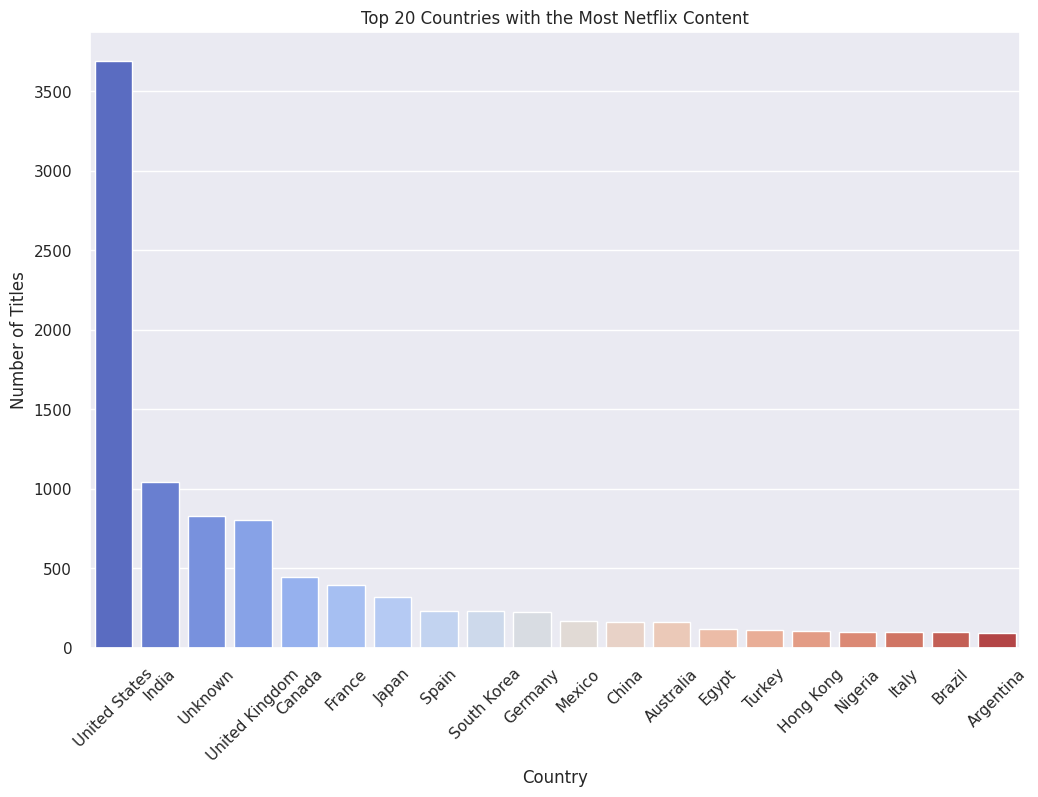

<Figure size 1200x800 with 0 Axes>

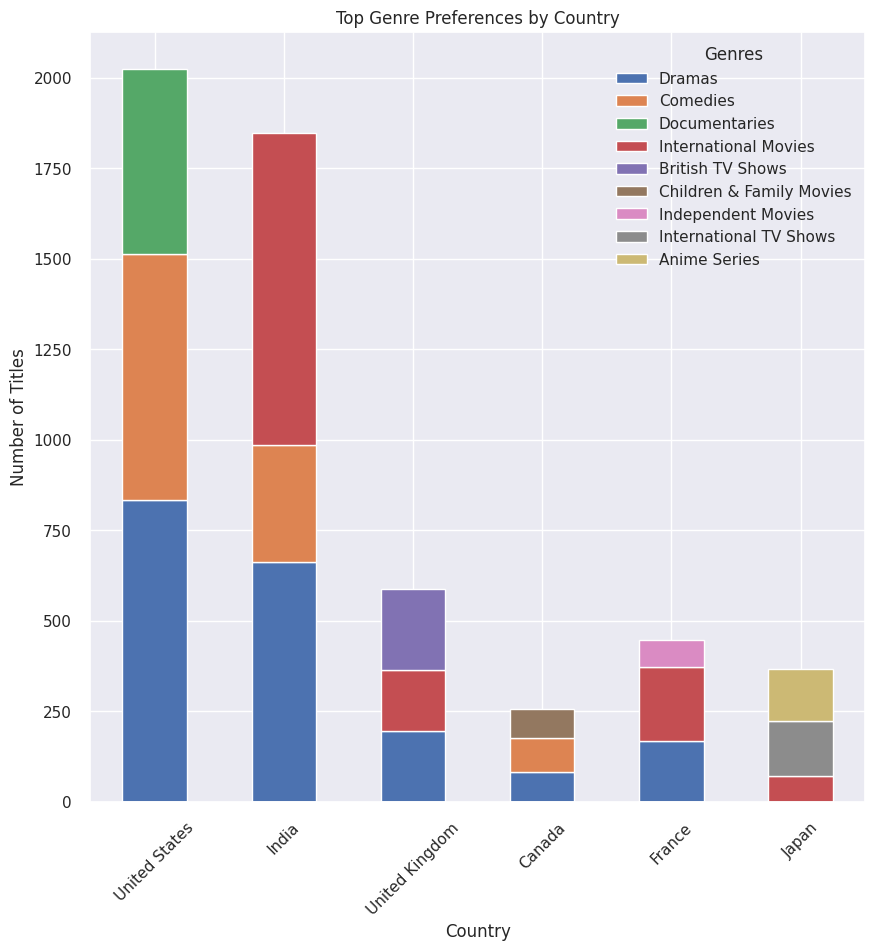

In [ ]:
# Data visualization for regional biases in content availability and regional preferences in terms of content type (genre)
import matplotlib.pyplot as plt
import seaborn as sns
# Preparing data
country_counts = netflix_data['country'].str.split(', ').explode().value_counts()
top_countries = country_counts.head(20)

# Preparing data for regional preferences in terms of content type (genre)
expanded_data = netflix_data.dropna(subset=['country', 'listed_in'])
expanded_data['country'] = expanded_data['country'].str.split(', ')
expanded_data['listed_in'] = expanded_data['listed_in'].str.split(', ')
expanded_data = expanded_data.explode('country').explode('listed_in')

# Grouping by country and counting the most common genres
genre_preferences_by_country = expanded_data.groupby('country')['listed_in'].value_counts().groupby(level=0).head(3)
selected_countries = ['United States', 'India', 'United Kingdom', 'Canada', 'France', 'Japan']
genre_preferences_selected_countries = genre_preferences_by_country.loc[selected_countries]

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x=top_countries.index, y=top_countries.values, palette="coolwarm")
plt.title('Top 20 Countries with the Most Netflix Content')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

# Plotting genre preferences for selected countries
plt.figure(figsize=(12, 8))
genre_preferences_selected_countries.unstack().plot(kind='bar', stacked=True)
plt.title('Top Genre Preferences by Country')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.legend(title='Genres')
plt.xticks(rotation=45)
plt.show()






# 2. Content Duration and Reception:
Key Questions:
1. Does content duration correlate with viewer engagement?
2. Are shorter or longer content formats more likely to be well-received?

Implication: Understanding content duration is critical for maintaining high viewer engagement and satisfaction. This will help Netflix understand how customer engagement has evolved. Also, Netflix can optimize the production of its movies and television shows, leading to better budget management.


In [ ]:
# Importing necessary libraries
import pandas as pd

# Splitting the dataset into movies and TV shows
movies = netflix_data[netflix_data['type'] == 'Movie']
tv_shows = netflix_data[netflix_data['type'] == 'TV Show']

# Handling NaN values and converting movie durations from string to integer (minutes)
movies = movies.dropna(subset=['duration'])
movies['duration'] = movies['duration'].str.extract('(\d+)').astype(int)

# Handling NaN values and converting TV show durations from string to integer (number of seasons)
tv_shows = tv_shows.dropna(subset=['duration'])
tv_shows['duration'] = tv_shows['duration'].str.extract('(\d+)').astype(int)

# Summary statistics for movie and TV show durations
movie_duration_summary = movies['duration'].describe()
tv_show_duration_summary = tv_shows['duration'].describe()
movie_duration_summary, tv_show_duration_summary

(count    6128.000000
 mean       99.577187
 std        28.290593
 min         3.000000
 25%        87.000000
 50%        98.000000
 75%       114.000000
 max       312.000000
 Name: duration, dtype: float64,
 count    2676.000000
 mean        1.764948
 std         1.582752
 min         1.000000
 25%         1.000000
 50%         1.000000
 75%         2.000000
 max        17.000000
 Name: duration, dtype: float64)

# Movies
1. Count: 6,128 movies
2. Average Duration: Approximately 99.58 minutes
3. Standard Deviation: 28.29 minutes
4. Minimum Duration: 3 minutes
5. Maximum Duration: 312 minutes
6. Median (50th percentile): 98 minutes

# TV Shows
1. Count: 2,676 TV shows
2. Average Number of Seasons: Approximately 1.76
3. Standard Deviation: 1.58 seasons
4. Minimum Number of Seasons: 1
5. Maximum Number of Seasons: 17
6. Median (50th percentile): 1 season

This analysis shows the range and distribution of content lengths on Netflix.
However, to answer the questions about the correlation between content duration and viewer engagement, and whether shorter or longer formats are more likely to be well-received, additional data on viewer engagement (such as ratings or watch time) would be necessary, which is not available in this dataset. ​

# Data visualization for 2. Content Duration and Reception:
1. Distribution of Movie Durations on Netflix:
The histogram shows the distribution of movie durations in minutes.
Most movies on Netflix are clustered around 80 to 120 minutes, with a peak around 100 minutes.
This visualization indicates that Netflix has a wide range of movie durations, but most tend to be of standard feature-length.
2. Distribution of TV Show Durations on Netflix:
The bar chart displays the distribution of TV show durations in terms of the number of seasons.
A significant majority of TV shows on Netflix have only one season. There is a rapid decline in the number of shows as the number of seasons increases.
This suggests that Netflix's TV show catalog is heavily skewed towards single-season series, possibly indicating a focus on mini-series or limited series.

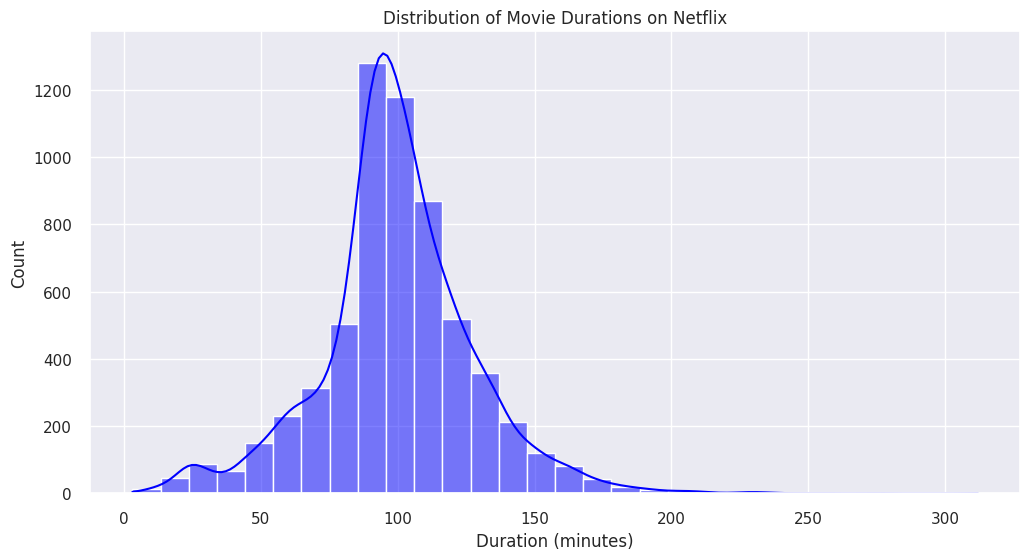

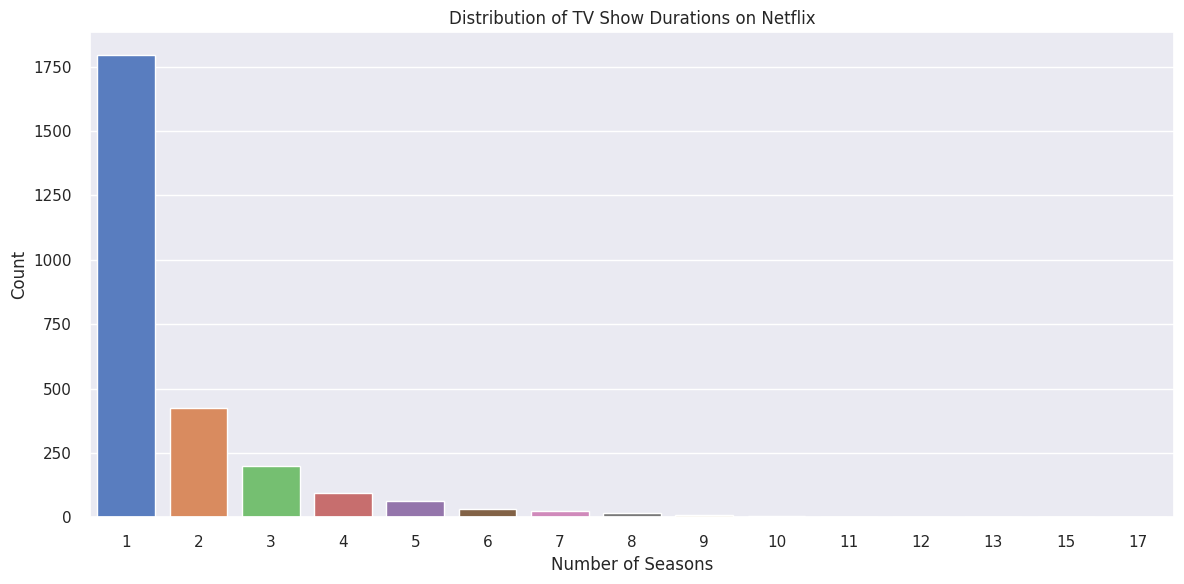

In [ ]:
# Preparing data
movies_duration = movies['duration']
tv_shows_duration = tv_shows['duration']

# Plotting the distribution of movie durations
plt.figure(figsize=(12, 6))
sns.histplot(movies_duration, kde=True, bins=30, color='blue')
plt.title('Distribution of Movie Durations on Netflix')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns

# First, check if the 'duration' column is a string and needs cleaning
if tv_shows['duration'].dtype == 'O':  # 'O' stands for object, which is often used for strings in pandas
    # If it's a string, replace 'Season' and 's', then convert to numeric
    tv_shows['duration'] = tv_shows['duration'].str.replace(' Season', '').str.replace('s', '')
    tv_shows['duration'] = pd.to_numeric(tv_shows['duration'], errors='coerce')

# Now that we have ensured 'duration' is numeric, we can calculate the value counts
tv_show_duration_counts = tv_shows['duration'].value_counts().sort_index()

# Plot the distribution of TV show durations
plt.figure(figsize=(12, 6))
sns.barplot(x=tv_show_duration_counts.index, y=tv_show_duration_counts.values, palette="muted")
plt.title('Distribution of TV Show Durations on Netflix')
plt.xlabel('Number of Seasons')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()




# 3. Content Expansion and Seasonal Trends:
Key Questions:
1. What types of content were added during these expansion periods?
2. Are there monthly or seasonal trends in content additions?
3. Do certain types of content, like holiday-themed content, gain popularity during specific times of the year?
4. Has the Covid pandemic had influences on the trend of content added?

Implications: These analyses can help to gain insights into the strategy on Netflix's content expansion, optimize its content release schedule, and better cater to viewer preferences during specific seasons and events.

In [ ]:
# Converting 'date_added' to datetime, handling inconsistent formats
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'], errors='coerce')
netflix_data['year_added'] = netflix_data['date_added'].dt.year
netflix_data['month_added'] = netflix_data['date_added'].dt.month_name()

# Dropping rows where 'date_added' is NaT (not a time)
netflix_data = netflix_data.dropna(subset=['date_added'])

# 1. Analyzing types of content added during expansion periods
content_types = netflix_data.groupby(['year_added', 'type']).size().unstack().fillna(0)

# 2. Monthly or seasonal trends in content additions
seasonal_trends = netflix_data.groupby(['year_added', 'month_added']).size().unstack().fillna(0)

# 3. Popularity of certain types of content during specific times of the year
# Focusing on holiday-themed content
holiday_themes = ['Christmas', 'Halloween', 'Valentine']
holiday_content = netflix_data[netflix_data['description'].str.contains('|'.join(holiday_themes), case=False)]
holiday_content_trends = holiday_content.groupby(['year_added', 'month_added']).size().unstack().fillna(0)

# 4. Covid pandemic influence on content added
# Assuming significant impact in 2020 and 2021
covid_impact = netflix_data[netflix_data['year_added'] >= 2020].groupby(['year_added', 'type']).size().unstack().fillna(0)

content_types, seasonal_trends, holiday_content_trends, covid_impact

(type         Movie  TV Show
 year_added                 
 2008.0         1.0      1.0
 2009.0         2.0      0.0
 2010.0         1.0      0.0
 2011.0        13.0      0.0
 2012.0         3.0      0.0
 2013.0         6.0      5.0
 2014.0        19.0      5.0
 2015.0        56.0     26.0
 2016.0       253.0    176.0
 2017.0       839.0    349.0
 2018.0      1237.0    412.0
 2019.0      1424.0    592.0
 2020.0      1284.0    595.0
 2021.0       993.0    505.0,
 month_added  April  August  December  February  January   July   June  March  \
 year_added                                                                     
 2008.0         0.0     0.0       0.0       1.0      1.0    0.0    0.0    0.0   
 2009.0         0.0     0.0       0.0       0.0      0.0    0.0    0.0    0.0   
 2010.0         0.0     0.0       0.0       0.0      0.0    0.0    0.0    0.0   
 2011.0         0.0     0.0       0.0       0.0      0.0    0.0    0.0    0.0   
 2012.0         0.0     0.0       1.0       1.0  

1. Types of Content Added During Expansion Periods: The analysis shows the number of movies and TV shows added each year, indicating a significant increase in both categories over time.
2. Monthly or Seasonal Trends in Content Additions: This part of the analysis reveals trends in content additions across different months and years, helping to identify any seasonal patterns in content release.
3. Popularity of Certain Types of Content During Specific Times of the Year: The analysis focuses on holiday-themed content (like Christmas, Halloween, Valentine's Day) and its trends over the years, showing how specific types of content may gain popularity during particular times.
4. Covid Pandemic Influence on Content Added: This analysis investigates the changes in content addition during the Covid pandemic years (2020 and 2021), revealing how the pandemic might have influenced Netflix's content strategy.

# Data Visualization for 3. Content Expansion and Seasonal Trends:
1. Netflix Content Added by Year and Type:
This bar chart shows the number of movies and TV shows added to Netflix each year, illustrating the platform's expanding content library over time.
2. Monthly Netflix Content Additions in the Last 5 Years:
The heatmap displays the monthly content additions for the last five years, highlighting any seasonal or monthly trends in content release.
3. Holiday-Themed Netflix Content Trends:
This heatmap showcases the trends in holiday-themed content (like Christmas, Halloween, Valentine's Day) added to Netflix over the years, indicating popularity during specific times.
4. Netflix Content Added During Covid Pandemic:
The bar chart for 2020 and 2021 shows the impact of the Covid pandemic on the types of content added, revealing any shifts in content strategy during this period.

<Figure size 1200x600 with 0 Axes>

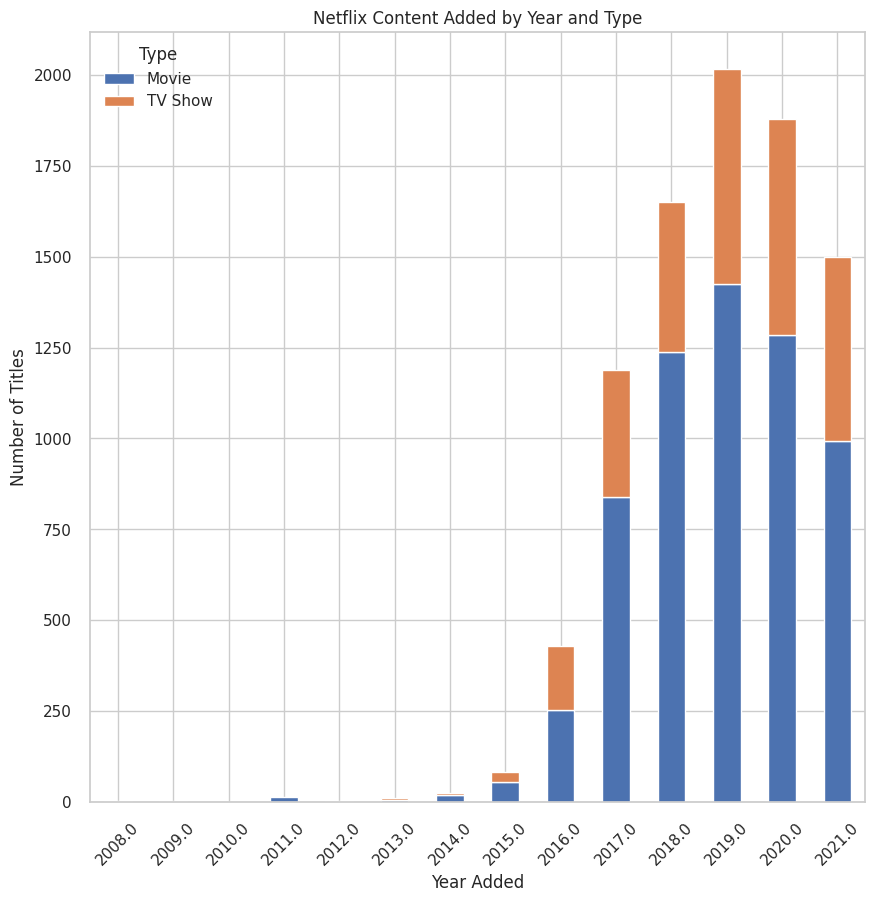

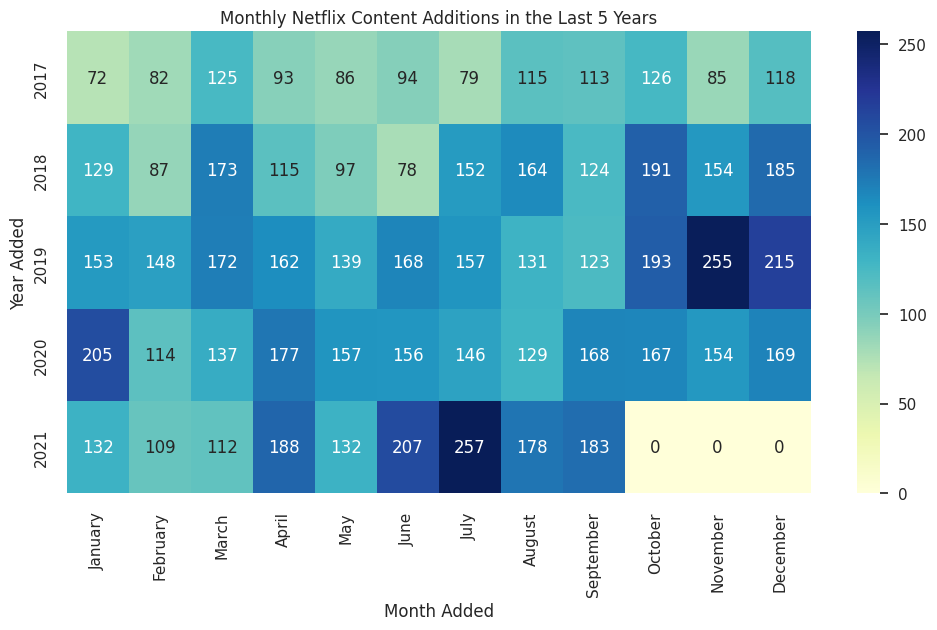

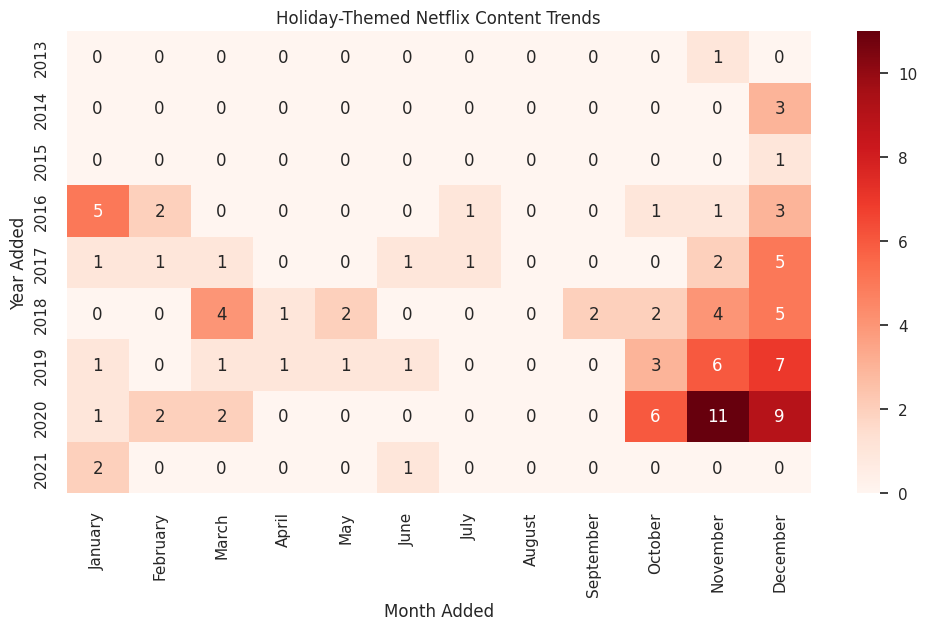

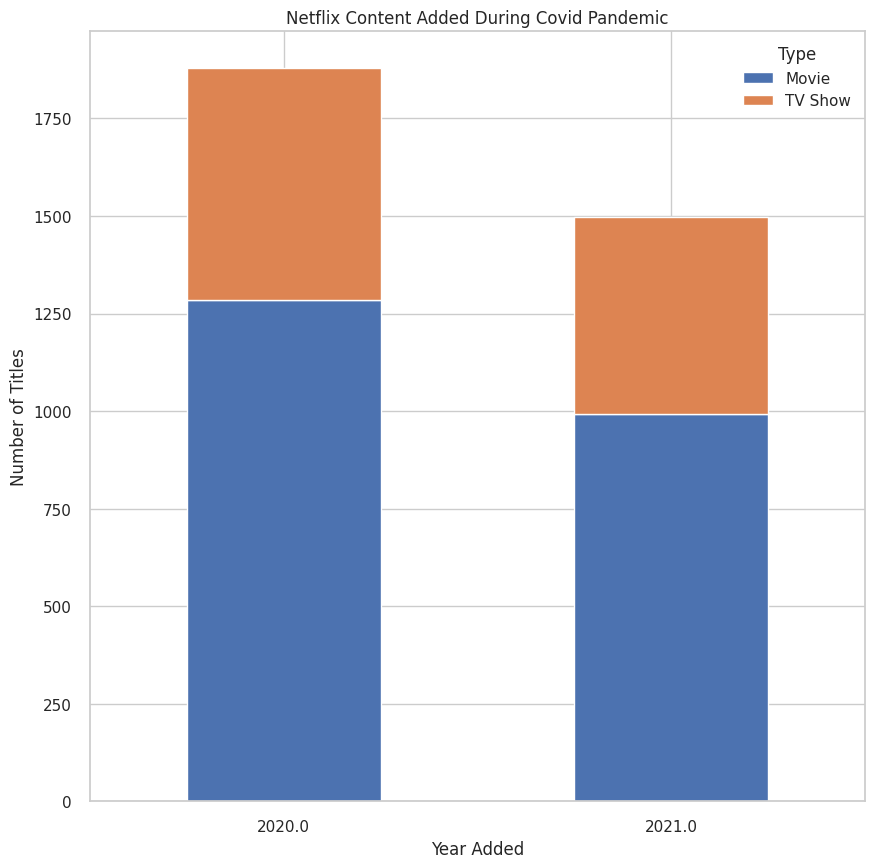

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import pandas as pd
# Setting up the visualization style
sns.set(style="whitegrid")

# Data Visualization

# 1. Types of Content Added During Expansion Periods
plt.figure(figsize=(12, 6))
content_types.plot(kind='bar', stacked=True)
plt.title('Netflix Content Added by Year and Type')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.legend(title='Type')
plt.xticks(rotation=45)
plt.show()

# Monthly Trends in Content Additions for the Last 5 Years (taking a subset for clearer visualization)
last_5_years = seasonal_trends.tail(5)

# Assuming 'last_5_years' and 'holiday_content_trends' are pandas DataFrames
# Ensure the DataFrame index for years is of integer type to avoid decimal points on the y-axis
last_5_years.index = last_5_years.index.map(int)
holiday_content_trends.index = holiday_content_trends.index.map(int)

# Ensure that all data for annotation is of integer type
# Replace NaNs with zeros and convert to integers
last_5_years = last_5_years.fillna(0).astype(int)
holiday_content_trends = holiday_content_trends.fillna(0).astype(int)

# Create a sorted list of month names to ensure the DataFrame columns follow the calendar order
months_order = list(calendar.month_name[1:])  # This will exclude the empty string at the start

# Reindex the DataFrame columns based on the 'months_order' list
# This ensures the months are in the correct order
last_5_years = last_5_years.reindex(columns=months_order)
holiday_content_trends = holiday_content_trends.reindex(columns=months_order)

# 2: Monthly Netflix Content Additions in the Last 5 Years
plt.figure(figsize=(12, 6))
sns.heatmap(last_5_years, cmap='YlGnBu', annot=True, fmt='g')  # 'd' displays integers
plt.title('Monthly Netflix Content Additions in the Last 5 Years')
plt.xlabel('Month Added')
plt.ylabel('Year Added')
plt.show()

# 3: Holiday-Themed Netflix Content Trends
plt.figure(figsize=(12, 6))
sns.heatmap(holiday_content_trends, cmap='Reds', annot=True, fmt='d')  # 'd' displays integers
plt.title('Holiday-Themed Netflix Content Trends')
plt.xlabel('Month Added')
plt.ylabel('Year Added')
plt.show()

# 4. Covid Pandemic Influence on Content Added (2020 and 2021)
covid_impact.plot(kind='bar', stacked=True)
plt.title('Netflix Content Added During Covid Pandemic')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.legend(title='Type')
plt.xticks(rotation=0)
plt.show()


<Figure size 1200x600 with 0 Axes>

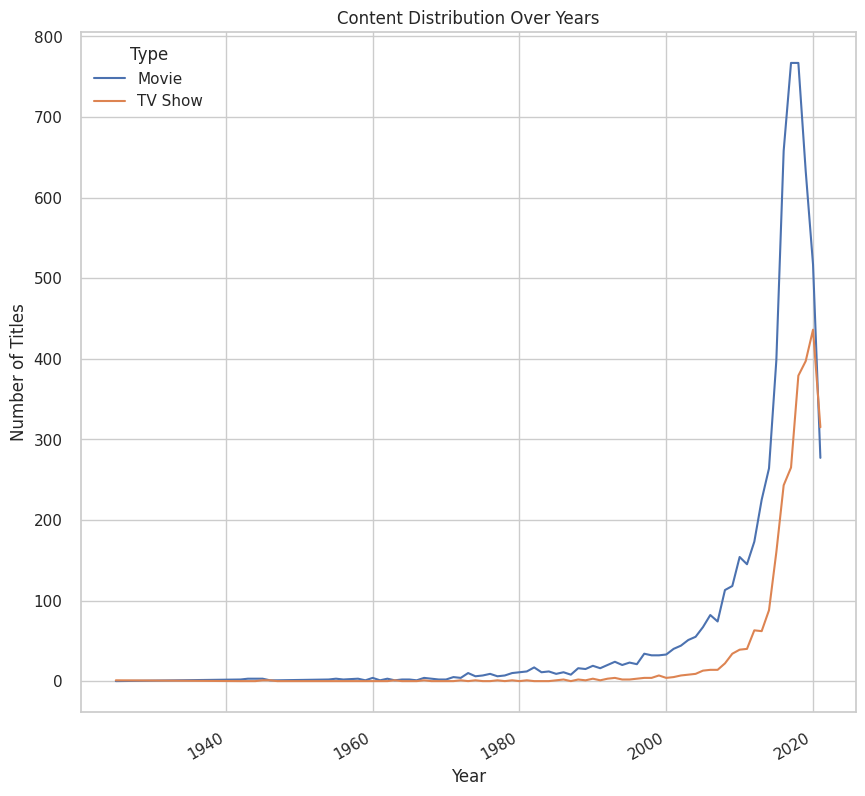

In [ ]:
# Assuming 'netflix_data' has a 'release_year' column
yearly_content = netflix_data.groupby(['release_year', 'type']).size().unstack().fillna(0)

plt.figure(figsize=(12, 6))
yearly_content.plot(kind='line')
plt.title('Content Distribution Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.legend(title='Type')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from pandas import DataFrame

import missingno

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

sns.set_theme(style="darkgrid")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load data
data= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/netflix_titles.csv')

In [ ]:
data['country'] = data['country'].fillna(data['country'].mode()[0])
data['date_added'] = data['date_added'].fillna(data['date_added'].mode()[0])
data['rating'] = data['rating'].fillna(data['country'].mode()[0])

In [ ]:
data.drop(['cast','director'],axis='columns',inplace=True)

In [ ]:
data.isna().sum()

show_id         0
type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        3
listed_in       0
description     0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
data['y_add'] = data['date_added'].apply(lambda x: x.split(" ")[-1])
data['y_add'].head()

0    2021
1    2021
2    2021
3    2021
4    2021
Name: y_add, dtype: object

In [ ]:
data['m_add'] = data['date_added'].apply(lambda x: x.split(" ")[0])
data['m_add'].head()

0    September
1    September
2    September
3    September
4    September
Name: m_add, dtype: object

In [ ]:
#dividing into different age groups depending upon rating
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
data['target_age'] = data['rating'].replace(ratings_ages)

In [ ]:
movie_df = data[data['type'] == 'Movie']
tv_df = data[data['type'] == 'TV Show']

In [ ]:
movie_df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,y_add,m_add,target_age
0,s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,September,Teens
6,s7,Movie,My Little Pony: A New Generation,United States,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021,September,Older Kids
7,s8,Movie,Sankofa,"United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021,September,Adults
9,s10,Movie,The Starling,United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021,September,Teens
12,s13,Movie,Je Suis Karl,"Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021,September,Adults


In [ ]:
def generate_age_df(df):
    new_df = df.groupby(['target_age']).agg({'show_id': 'count'}).reset_index()
    new_df = new_df[new_df['show_id'] != 0]
    new_df.columns = ['target_age', 'counts']
    new_df = new_df.sort_values('target_age')

    return new_df

In [ ]:
import plotly.express as px

# For Movies
movie_age_df = generate_age_df(movie_df)
movie_fig = px.pie(labels=movie_age_df['target_age'], values=movie_age_df['counts'],
                   names=movie_age_df['target_age'], width=550, height=550,
                   color_discrete_sequence=['#FF5733', '#FF8C1A', '#FFAF4C', '#FFD699'])

movie_fig.update_traces(textposition='inside',
                        textinfo='percent+label',
                        hole=0.75,
                        marker=dict(line=dict(color='white', width=2)))

movie_fig.update_layout(annotations=[dict(text='Movies',
                                           x=0.5, y=0.5, font_size=40, showarrow=False,
                                           font_color='black')],
                        showlegend=False)

movie_fig.show()

# For TV Series
tv_age_df = generate_age_df(tv_df)
tv_fig = px.pie(labels=tv_age_df['target_age'], values=tv_age_df['counts'],
                names=tv_age_df['target_age'], width=550, height=550,
                color_discrete_sequence=['#3366FF', '#6699FF', '#99CCFF', '#CCE5FF'])

tv_fig.update_traces(textposition='inside',
                     textinfo='percent+label',
                     hole=0.75,
                     marker=dict(line=dict(color='white', width=2)))

tv_fig.update_layout(annotations=[dict(text='TV Series',
                                        x=0.5, y=0.5, font_size=36, showarrow=False,
                                        font_color='black')],
                     showlegend=False)

tv_fig.show()




Understanding how NETFLIX recommendation engine works using networkx and TFIDF matrix

In [ ]:
# import librairies
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math as math
import time
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [14,14]

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/netflix_titles.csv')
# convert to datetime
df["date_added"] = pd.to_datetime(df['date_added'])
df['year'] = df['date_added'].dt.year
df['month'] = df['date_added'].dt.month
df['day'] = df['date_added'].dt.day
# convert columns "director, listed_in, cast and country" in columns that contain a real list
# the strip function is applied on the elements
# if the value is NaN, the new column contains a empty list []
df['directors'] = df['director'].apply(lambda l: [] if pd.isna(l) else [i.strip() for i in l.split(",")])
df['categories'] = df['listed_in'].apply(lambda l: [] if pd.isna(l) else [i.strip() for i in l.split(",")])
df['actors'] = df['cast'].apply(lambda l: [] if pd.isna(l) else [i.strip() for i in l.split(",")])
df['countries'] = df['country'].apply(lambda l: [] if pd.isna(l) else [i.strip() for i in l.split(",")])

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month,day,directors,categories,actors,countries
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,25.0,[Kirsten Johnson],[Documentaries],[],[United States]
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,24.0,[],"[International TV Shows, TV Dramas, TV Mysteries]","[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",[South Africa]
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0,24.0,[Julien Leclercq],"[Crime TV Shows, International TV Shows, TV Ac...","[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",[]
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0,24.0,[],"[Docuseries, Reality TV]",[],[]
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0,24.0,[],"[International TV Shows, Romantic TV Shows, TV...","[Mayur More, Jitendra Kumar, Ranjan Raj, Alam ...",[India]


KMeans clustering with TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.cluster import MiniBatchKMeans

# Build the tfidf matrix with the descriptions
start_time = time.time()
text_content = df['description']
vector = TfidfVectorizer(max_df=0.4,
                             min_df=1,
                             stop_words='english',
                             lowercase=True,
                             use_idf=True,
                             norm=u'l2',
                             smooth_idf=True
                            )
tfidf = vector.fit_transform(text_content)

# Clustering  Kmeans
k = 200
kmeans = MiniBatchKMeans(n_clusters = k)
kmeans.fit(tfidf)
centers = kmeans.cluster_centers_.argsort()[:,::-1]
terms = vector.get_feature_names_out()

request_transform = vector.transform(df['description'])
# new column cluster based on the description
df['cluster'] = kmeans.predict(request_transform)

df['cluster'].value_counts().head()

82     5302
143    2234
51      209
16      195
130     185
Name: cluster, dtype: int64

In [ ]:
# Find similar : get the top "n" movies with description similar to the target description
def find_similar(tfidf_matrix, index, top_n = 5):
    cosine_similarities = linear_kernel(tfidf_matrix[index:index+1], tfidf_matrix).flatten()
    related_docs_indices = [i for i in cosine_similarities.argsort()[::-1] if i != index]
    return [index for index in related_docs_indices][0:top_n]

creating nodes:

In [ ]:
# Create a graph with the label "MOVIE"
G = nx.Graph(label="MOVIE")

# Record the start time
start_time = time.time()

# Iterate through rows of the DataFrame
for i, rowi in df.iterrows():
    # Print progress updates
    if i % 1000 == 0:
        print("Iteration {} -- {} seconds --".format(i, time.time() - start_time))

    # Add a node for the movie with relevant attributes
    G.add_node(rowi['title'], key=rowi['show_id'], label="MOVIE", mtype=rowi['type'], rating=rowi['rating'])

    # Add nodes and edges for actors
    for element in rowi['actors']:
        G.add_node(element, label="PERSON")
        G.add_edge(rowi['title'], element, label="ACTED_IN")

    # Add nodes and edges for categories
    for element in rowi['categories']:
        G.add_node(element, label="CAT")
        G.add_edge(rowi['title'], element, label="CAT_IN")

    # Add nodes and edges for directors
    for element in rowi['directors']:
        G.add_node(element, label="PERSON")
        G.add_edge(rowi['title'], element, label="DIRECTED")

    # Add nodes and edges for countries
    for element in rowi['countries']:
        G.add_node(element, label="COU")
        G.add_edge(rowi['title'], element, label="COU_IN")

    # Find similar movies using TF-IDF
    indices = find_similar(tfidf, i, top_n=5)
    snode = "Sim(" + rowi['title'][:15].strip() + ")"
    G.add_node(snode, label="SIMILAR")
    G.add_edge(rowi['title'], snode, label="SIMILARITY")

    # Add edges for similar movies
    for element in indices:
        G.add_edge(snode, df['title'].loc[element], label="SIMILARITY")

# Print the finish time
print("Finish -- {} seconds --".format(time.time() - start_time))


Iteration 0 -- 0.03711652755737305 seconds --
Iteration 1000 -- 7.841325521469116 seconds --
Iteration 2000 -- 13.897175788879395 seconds --
Iteration 3000 -- 22.006383180618286 seconds --
Iteration 4000 -- 27.796351432800293 seconds --
Iteration 5000 -- 35.0156569480896 seconds --
Iteration 6000 -- 41.48239612579346 seconds --
Iteration 7000 -- 47.0591561794281 seconds --
Iteration 8000 -- 55.00146150588989 seconds --
Finish -- 59.37421131134033 seconds --


getting all adjacent nodes

In [ ]:
def get_all_adj_nodes(list_in):
    sub_graph=set()
    for m in list_in:
        sub_graph.add(m)
        for e in G.neighbors(m):
                sub_graph.add(e)
    return list(sub_graph)
def draw_sub_graph(sub_graph):
    subgraph = G.subgraph(sub_graph)
    colors=[]
    for e in subgraph.nodes():
        if G.nodes[e]['label']=="MOVIE":
            colors.append('red')
        elif G.nodes[e]['label']=="PERSON":
            colors.append('blue')
        elif G.nodes[e]['label']=="CAT":
            colors.append('yellow')
        elif G.nodes[e]['label']=="COU":
            colors.append('green')
        elif G.nodes[e]['label']=="SIMILAR":
            colors.append('orange')
        elif G.nodes[e]['label']=="CLUSTER":
            colors.append('orange')

    nx.draw(subgraph, with_labels=True, font_weight='bold',node_color=colors)
    plt.show()


comparing two movies

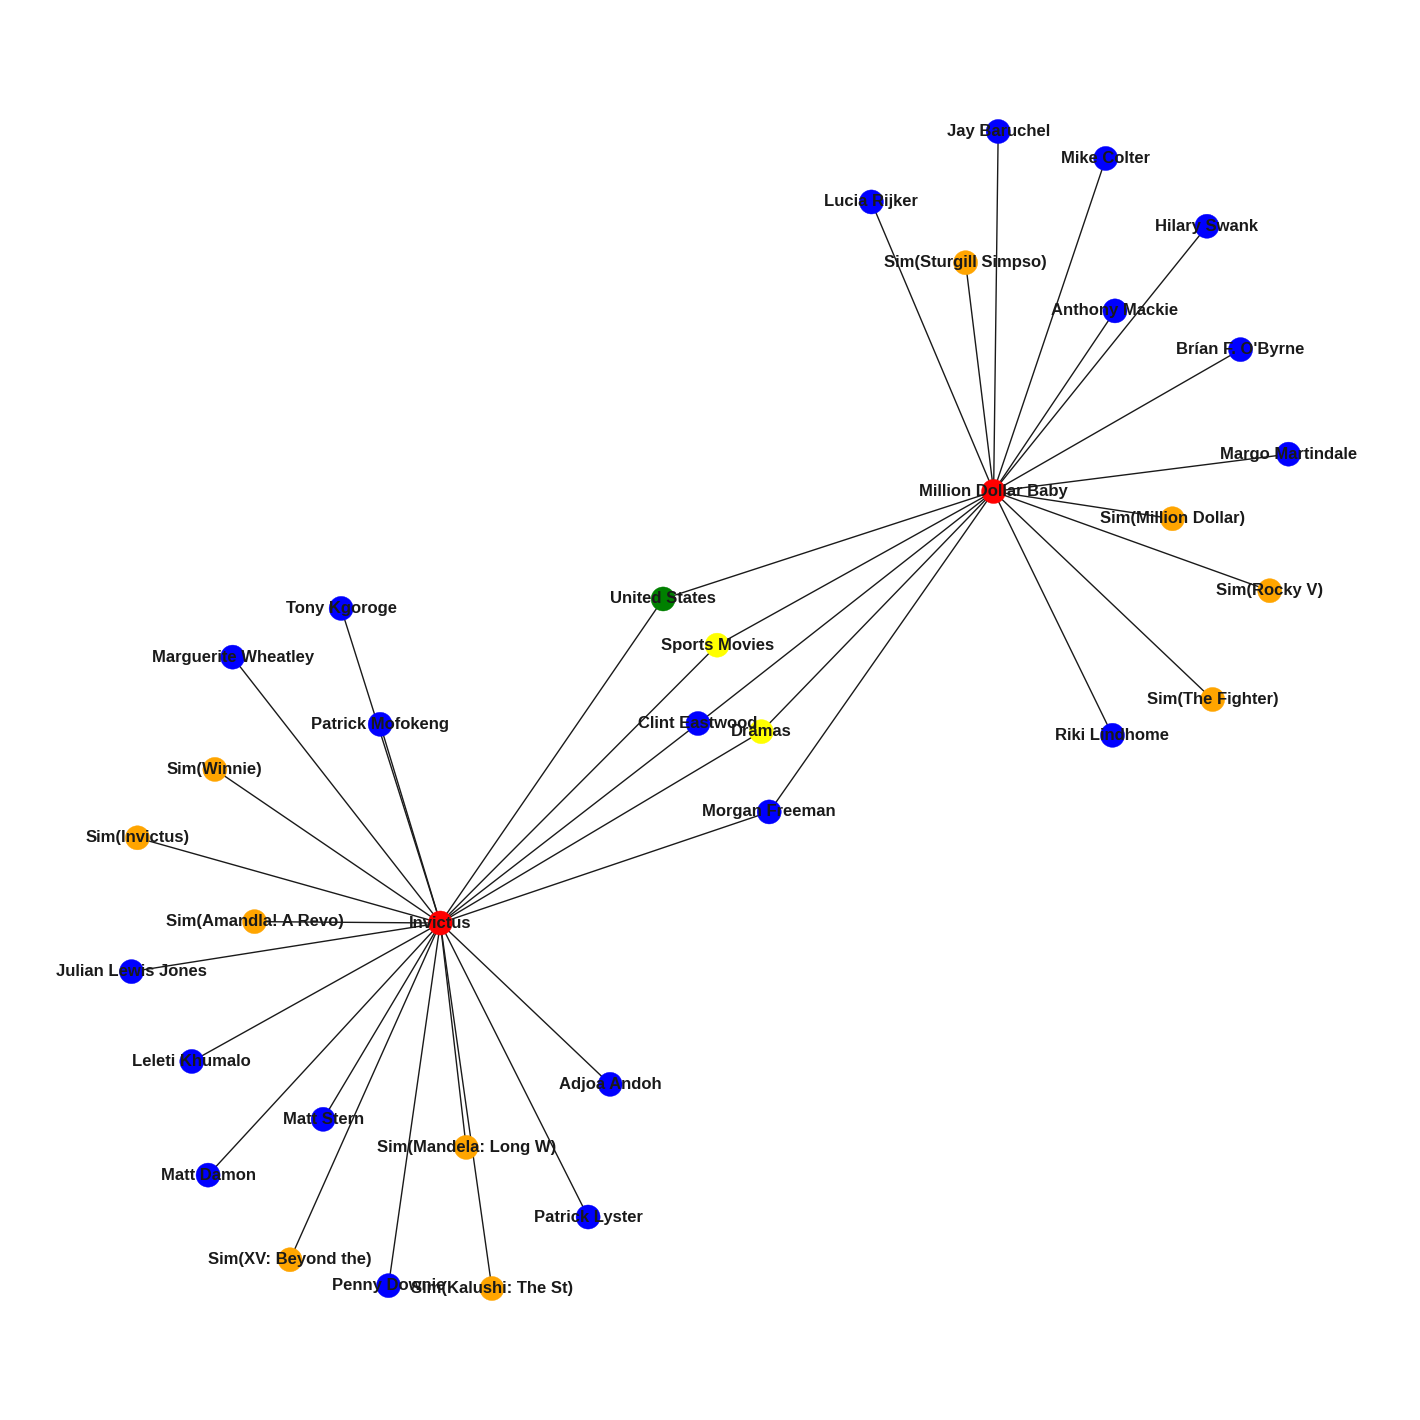

In [ ]:
list_in=["Invictus","Million Dollar Baby"]
sub_graph = get_all_adj_nodes(list_in)
draw_sub_graph(sub_graph)

In [ ]:
def get_recommendation(root):
    commons_dict = {}
    for e in G.neighbors(root):
        for e2 in G.neighbors(e):
            if e2==root:
                continue
            if G.nodes[e2]['label']=="MOVIE":
                commons = commons_dict.get(e2)
                if commons==None:
                    commons_dict.update({e2 : [e]})
                else:
                    commons.append(e)
                    commons_dict.update({e2 : commons})
    movies=[]
    weight=[]
    for key, values in commons_dict.items():
        w=0.0
        for e in values:
            w=w+1/math.log(G.degree(e))
        movies.append(key)
        weight.append(w)

    result = pd.Series(data=np.array(weight),index=movies)
    result.sort_values(inplace=True,ascending=False)
    return result;

In [ ]:
result = get_recommendation("Million Dollar Baby")
result2 = get_recommendation("Mystic River")
result3 = get_recommendation("Invictus")
result4 = get_recommendation("Gran Torino")
print("*"*40+"\n Recommendation for 'Million Dollar Baby'\n"+"*"*40)
print(result.head())
print("*"*40+"\n Recommendation for 'Mystic River'\n"+"*"*40)
print(result2.head())
print("*"*40+"\n Recommendation for 'Invictus'\n"+"*"*40)
print(result3.head())
print("*"*40+"\n Recommendation for 'Gran Torino'\n"+"*"*40)
print(result4.head())

****************************************
 Recommendation for 'Million Dollar Baby'
****************************************
Rocky V                                      1.954261
The Fighter                                  1.954261
Garfunkel and Oates: Trying to be Special    1.564448
Invictus                                     1.256132
Mother's Day                                 1.160289
dtype: float64
****************************************
 Recommendation for 'Mystic River'
****************************************
Salaakhen                     4.464885
Unexpectedly Yours            2.790553
The Drowning                  2.511481
Sleeping with Other People    2.482492
Tamasha                       2.360740
dtype: float64
****************************************
 Recommendation for 'Invictus'
****************************************
Mandela: Long Walk to Freedom                 1.965866
Kalushi: The Story of Solomon Mahlangu        1.802629
Amandla! A Revolution in Four Part Harmon

understand differences between Genres before apply Recommendation System

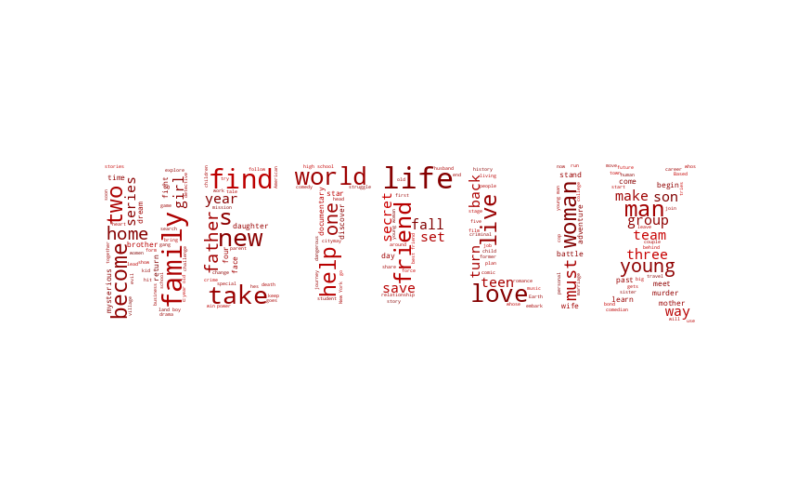

In [ ]:
from wordcloud import WordCloud
from PIL import Image
import random
import matplotlib.pyplot as plt

text = str(list(netflix_data['description'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')

# Function to generate a red color for words
def red_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 100%%, %f%%)" % random.randint(25, 40)

# Load the Netflix logo as a mask
mask = np.array(Image.open('/content/drive/MyDrive/Colab Notebooks/Data/Netflix-Brand-Logo.jpg'))

# Generate the WordCloud using the custom-shaped mask
wordcloud = WordCloud(
    background_color='white',
    width=1400,
    height=1400,
    max_words=170,
    mask=mask,
).generate(text)

# Recolor the WordCloud using the red_color_func
wordcloud.recolor(color_func=red_color_func)

# Display the WordCloud
plt.rcParams['figure.figsize'] = (10, 10)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
distinct_values = df['listed_in'].unique()

# Print the distinct values
print(distinct_values)

['Documentaries' 'International TV Shows, TV Dramas, TV Mysteries'
 'Crime TV Shows, International TV Shows, TV Action & Adventure'
 'Docuseries, Reality TV'
 'International TV Shows, Romantic TV Shows, TV Comedies'
 'TV Dramas, TV Horror, TV Mysteries' 'Children & Family Movies'
 'Dramas, Independent Movies, International Movies'
 'British TV Shows, Reality TV' 'Comedies, Dramas'
 'Crime TV Shows, Docuseries, International TV Shows'
 'Dramas, International Movies' 'Children & Family Movies, Comedies'
 'British TV Shows, Crime TV Shows, Docuseries' 'TV Comedies, TV Dramas'
 'Documentaries, International Movies'
 'Crime TV Shows, Spanish-Language TV Shows, TV Dramas' 'Thrillers'
 'International TV Shows, Spanish-Language TV Shows, TV Action & Adventure'
 'International TV Shows, TV Action & Adventure, TV Dramas'
 'Comedies, International Movies'
 'Comedies, International Movies, Romantic Movies'
 'Docuseries, International TV Shows, Reality TV'
 'Comedies, International Movies, Music & 

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from PIL import Image

# Download stopwords resource
nltk.download('stopwords')

# Assuming your data is in a DataFrame called 'df'
# If not, read your data into a DataFrame using pd.read_csv or pd.read_excel

# Separate genres in the 'listed_in' column
netflix_data['genres'] = netflix_data['listed_in'].str.split(', ')

# Count the top 5 genres
genre_counts = netflix_data['genres'].explode().value_counts().head(5)
print("Top 5 genres:\n", genre_counts)

# Link descriptions with top genres
top_genres = genre_counts.index.tolist()
netflix_data['top_genre'] = netflix_data['genres'].apply(lambda x: set(x) & set(top_genres))

Top 5 genres:
 International Movies      2752
Dramas                    2427
Comedies                  1674
International TV Shows    1350
Documentaries              869
Name: genres, dtype: int64


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


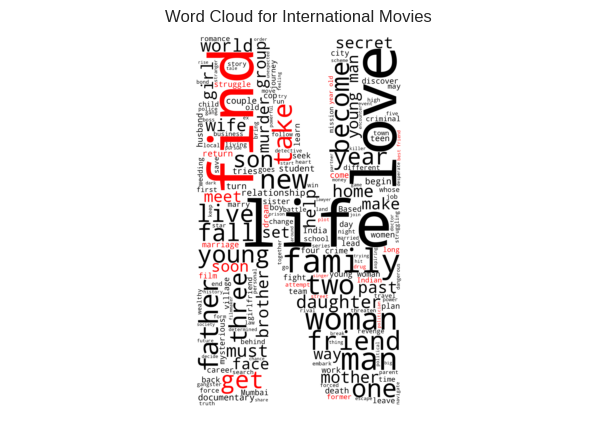

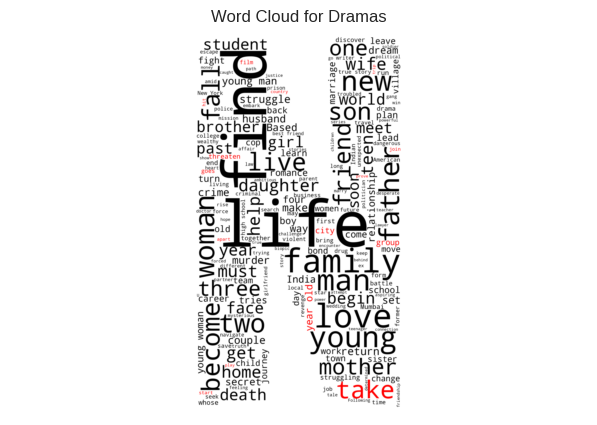

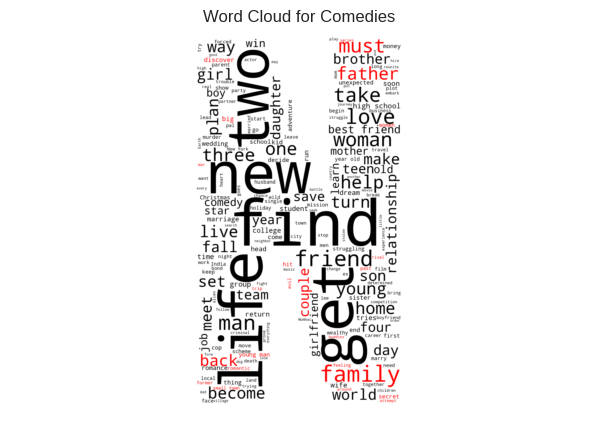

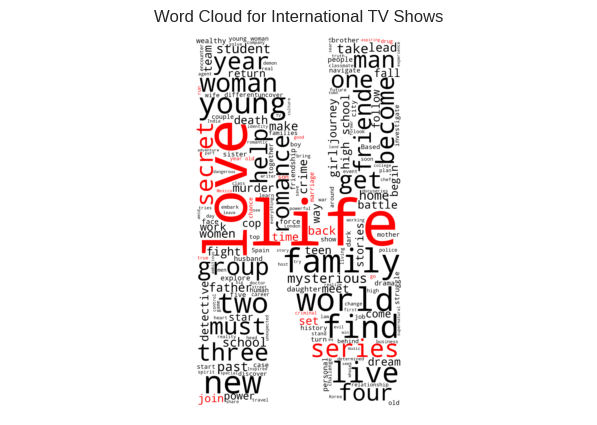

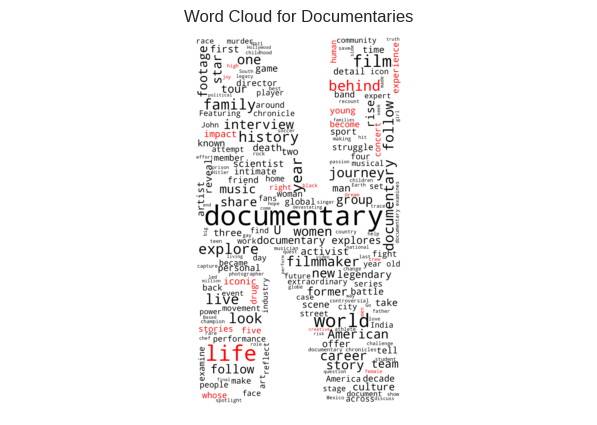

In [ ]:
# Function to generate black and red colors for words
def black_red_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    # Use black color for most words and red for a small percentage
    if np.random.rand() < 0.1:
        return "red"
    else:
        return "black"

# Create word clouds for each top genre with black and red colors
for genre in top_genres:
    text = ' '.join(netflix_data[netflix_data['top_genre'].apply(lambda x: genre in x)]['description'])
    mask = np.array(Image.open("/content/drive/MyDrive/Colab Notebooks/Data/NLogo.jpg"))

    wordcloud = WordCloud(width=800, height=400, background_color='white', mask=mask,
                          stopwords=set(stopwords.words('english')), color_func=black_red_color_func).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {genre}')
    plt.axis('off')
    plt.show()